1. ################ API DE NOTICIAS

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timezone

# 🔹 1️⃣ Configurar API
API_KEY = "API_KEY_GENERADA"  # Reemplaza con tu clave de API
URL = f"https://newsapi.org/v2/top-headlines?country=us&apiKey={API_KEY}"

# 🔹 2️⃣ Obtener datos desde la API
response = requests.get(URL)
if response.status_code != 200:
    print(f"❌ Error al obtener datos: {response.status_code}")
    exit()

data = response.json()

# 🔹 3️⃣ Verificar si hay artículos
if "articles" not in data or not data["articles"]:
    print("❌ No se encontraron noticias en la API.")
    exit()

# 🔹 4️⃣ Convertir a DataFrame
df = pd.DataFrame(data["articles"])

# 🔹 5️⃣ Normalizar la columna "source" (que es un diccionario)
if "source" in df.columns:
    df["source"] = df["source"].apply(lambda x: x.get("name") if isinstance(x, dict) else x)



In [ ]:
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,title_is_valid,combined_text,title_length,description_length,valid_url,news_age_days
0,Pitchfork,"Nina Corcoran, Walden Green","The Beatles Biopics Cast Paul Mescal, Barry Ke...",Director Sam Mendes also confirmed an April 20...,https://pitchfork.com/news/the-beatles-biopics...,https://media.pitchfork.com/photos/67eb6724227...,2025-04-01 04:27:23+00:00,Sam Mendes officially confirmed the main cast ...,True,"The Beatles Biopics Cast Paul Mescal, Barry Ke...",111,107,True,1
1,CNBC,Lisa Kailai Han,U.S. stock futures slip as investors await cla...,Wall Street awaited clarity on President Donal...,https://www.cnbc.com/2025/03/31/stock-market-t...,https://image.cnbcfm.com/api/v1/image/10812364...,2025-04-01 04:23:00+00:00,U.S. stock futures slipped on Tuesday morning ...,True,U.S. stock futures slip as investors await cla...,99,76,True,1
2,CNN,Jackie Wattles,SpaceX launches 4 people on a polar orbit neve...,"The four-person crew, led by cryptocurrency bi...",https://www.cnn.com/2025/03/31/science/fram2-l...,https://media.cnn.com/api/v1/images/stellar/pr...,2025-04-01 03:06:00+00:00,Relive the launch of the SpaceX Fram2 mission ...,True,SpaceX launches 4 people on a polar orbit neve...,70,140,True,1
3,BBC News,None,Florida special election leaves Republicans an...,"With a 218 to 213 majority in the House, Repub...",https://www.bbc.com/news/articles/c209jxv77rjo,https://ichef.bbci.co.uk/news/1024/branded_new...,2025-04-01 02:56:22+00:00,"Anthony ZurcherReporting from\r\nOcala, Florid...",True,Florida special election leaves Republicans an...,57,117,True,1
4,Bloomberg,"Mackenzie Hawkins, Ian King",US Chip Grants In Limbo as Lutnick Pushes for ...,Commerce Secretary Howard Lutnick has signaled...,https://www.bloomberg.com/news/articles/2025-0...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,2025-04-01 02:38:00+00:00,Commerce Secretary Howard Lutnick has signaled...,True,US Chip Grants In Limbo as Lutnick Pushes for ...,80,256,True,1


In [ ]:
# 🔹 Indicadores de Calidad de Datos (DAMA-DMBOK)

## 1. Completitud: % de valores nulos por columna
null_percent = df.isnull().sum() / len(df) * 100
print("\n📊 % de valores nulos por columna:\n", null_percent)

## 2. Consistencia: Verificar si los títulos contienen caracteres extraños
df["title_is_valid"] = df["title"].apply(lambda x: isinstance(x, str) and len(x) > 5)
print("\n✔ Consistencia: % de títulos válidos:", df["title_is_valid"].mean() * 100)

## 3. Unicidad: Noticias duplicadas
df["combined_text"] = df["title"].astype(str) + " " + df["description"].astype(str)  # Combinar texto
duplicate_count = df.duplicated(subset=["combined_text"]).sum()
print("\n🔄 Noticias duplicadas:", duplicate_count)

## 4. Precisión: Calcular la longitud de títulos y descripciones
df["title_length"] = df["title"].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df["description_length"] = df["description"].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
print("\n📌 Estadísticas de longitud de títulos:\n", df["title_length"].describe())
print("\n📌 Estadísticas de longitud de descripciones:\n", df["description_length"].describe())

## 5. Validez: Si los valores cumplen reglas esperadas
df["valid_url"] = df["url"].apply(lambda x: isinstance(x, str) and x.startswith("http"))
print("\n🔗 URLs válidas:", df["valid_url"].mean() * 100, "%")

## 6. Oportunidad: frescura de la noticia
df["publishedAt"] = pd.to_datetime(df["publishedAt"], errors="coerce")
df["news_age_days"] = (datetime.now(timezone.utc) - df["publishedAt"]).dt.days
print("\n🕒 Edad promedio de las noticias en días:", df["news_age_days"].mean())


📊 % de valores nulos por columna:
 source          0.000000
author         11.764706
title           0.000000
description     5.882353
url             0.000000
urlToImage      5.882353
publishedAt     0.000000
content         5.882353
dtype: float64

✔ Consistencia: % de títulos válidos: 100.0

🔄 Noticias duplicadas: 0

📌 Estadísticas de longitud de títulos:
 count     17.000000
mean      85.117647
std       18.271844
min       56.000000
25%       71.000000
50%       85.000000
75%       99.000000
max      114.000000
Name: title_length, dtype: float64

📌 Estadísticas de longitud de descripciones:
 count     17.000000
mean     151.352941
std       78.785263
min        0.000000
25%       95.000000
50%      140.000000
75%      241.000000
max      260.000000
Name: description_length, dtype: float64

🔗 URLs válidas: 100.0 %

🕒 Edad promedio de las noticias en días: 1.0


A continuación se indicará la justificación de cada indicador en el caso de las noticias alineado al proyecto de forecast de demanda:

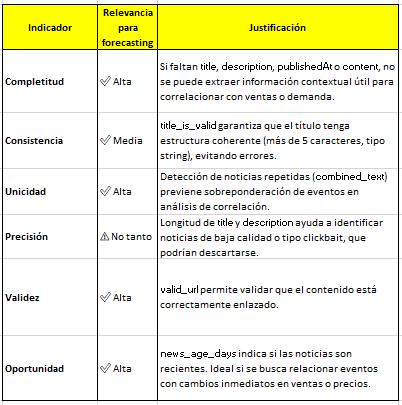

2. ############## API DE TEMPERATURA

In [1]:
import requests
import pandas as pd
import numpy as np

# Definir la API Key y URL
API_KEY = "NO_ES_NECESARIO_API_KEY"
BASE_URL = "https://api.open-meteo.com/v1/forecast"

# Parámetros de consulta
params = {
    "latitude": -12.0464,  # Coordenadas de Lima, Perú (ejemplo)
    "longitude": -77.0428,
    "hourly": "temperature_2m",
    "start": "2024-04-01T00:00",  # Fecha de inicio
    "end": "2024-04-03T23:00",  # Fecha de fin
    "timezone": "America/Lima"
}

# Hacer la solicitud a la API
response = requests.get(BASE_URL, params=params)

data = response.json()

# Extraer datos y crear DataFrame
times = data['hourly']['time']
temperatures = data['hourly']['temperature_2m']
df = pd.DataFrame({"datetime": times, "temperature": temperatures})

# Convertir la columna datetime a formato de fecha
df['datetime'] = pd.to_datetime(df['datetime'])

# Indicadores de Calidad de Datos según DAMA

def data_quality_indicators(df):
    indicators = {}

    # 1. Completitud: Porcentaje de valores nulos
    indicators['completitud_%'] = 100 - (df.isnull().sum().sum() / df.size * 100)

    # 2. Consistencia: Verificar si los datos están dentro de un rango lógico (-50 a 60°C)
    inconsistent_values = df[(df['temperature'] < -50) | (df['temperature'] > 60)].shape[0]
    indicators['consistencia_%'] = 100 - (inconsistent_values / len(df) * 100)

    # 3. Precisión: Comprobar si los valores tienen decimales dentro de un rango lógico
    df['decimal_part'] = df['temperature'] % 1
    precision_outliers = df[(df['decimal_part'] > 0.99) | (df['decimal_part'] < 0.01)].shape[0]
    indicators['precision_%'] = 100 - (precision_outliers / len(df) * 100)

    # 4. Temporalidad: Diferencia entre registros para verificar periodicidad
    df['time_diff'] = df['datetime'].diff().dt.total_seconds() / 3600
    missing_intervals = df['time_diff'].isnull().sum() + (df['time_diff'] != 1).sum()
    indicators['temporalidad_%'] = 100 - (missing_intervals / len(df) * 100)

    return indicators

# Calcular indicadores de calidad
indicators = data_quality_indicators(df)

# Mostrar dataset y calidad de datos
print("Dataset de Temperatura:")
print(df.head())
print("\nIndicadores de Calidad de Datos:")
print(indicators)

Dataset de Temperatura:
             datetime  temperature  decimal_part  time_diff
0 2025-04-03 00:00:00         20.1           0.1        NaN
1 2025-04-03 01:00:00         20.0           0.0        1.0
2 2025-04-03 02:00:00         19.8           0.8        1.0
3 2025-04-03 03:00:00         19.7           0.7        1.0
4 2025-04-03 04:00:00         19.6           0.6        1.0

Indicadores de Calidad de Datos:
{'completitud_%': np.float64(100.0), 'consistencia_%': 100.0, 'precision_%': 90.47619047619048, 'temporalidad_%': np.float64(98.80952380952381)}


Abajo se indicará la justificación de cada indicador en el caso de la temperatura alineado al proyecto de forecast de demanda:

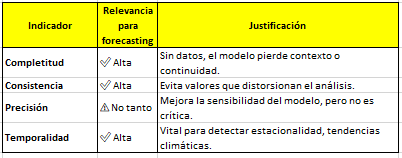

3. ##################### API DE TIPO DE CAMBIO

In [2]:
import requests
import pandas as pd

# Definir la API Key y URL de la API de FreeCurrencyAPI
API_KEY = "API_KEY_GENERADA"
BASE_URL = "https://api.freecurrencyapi.com/v1/latest"

# Función para obtener datos de tipo de cambio
def get_exchange_rates(base_currency="USD"):
    params = {"apikey": API_KEY, "base_currency": base_currency}
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if "data" in data:
        df = pd.DataFrame(list(data["data"].items()), columns=["Currency", "Exchange Rate"])
        df["Base Currency"] = base_currency
        return df
    else:
        print("Error obteniendo datos:", data)
        return None

# Obtener datos y guardarlos en un dataset
df_exchange = get_exchange_rates()
print(df_exchange.head())

# Indicadores de calidad de datos (DAMA)
def quality_indicators(df):
    indicators = {
        "Completitud": df.notnull().sum() / len(df),
        "Unicidad": df.nunique() / len(df),
        "Consistencia": df.duplicated().sum() == 0,
        "Validez": df.apply(lambda x: (x >= 0).all() if x.dtype in ['int64', 'float64'] else True).all(),
    }
    return pd.DataFrame(indicators)

# Evaluar calidad de los datos
quality_report = quality_indicators(df_exchange)
print(quality_report)


  Currency  Exchange Rate Base Currency
0      AUD       1.595580           USD
1      BGN       1.793780           USD
2      BRL       5.662411           USD
3      CAD       1.421700           USD
4      CHF       0.877040           USD
               Completitud  Unicidad  Consistencia  Validez
Currency               1.0  1.000000          True     True
Exchange Rate          1.0  1.000000          True     True
Base Currency          1.0  0.030303          True     True


Análogamente se indicará la justificación de cada indicador en el caso del tipo de cambio alineado al proyecto de forecast de demanda:

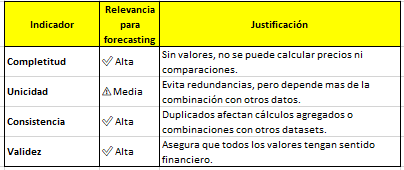